## Variable distribution

### Linear Regression Assumptions

Linear Regression has the following assumptions over the predictor variables X:

- Linear relationship with the outcome Y
- Multivariate normality
- No or little multicollinearity
- Homoscedasticity

We discussed the linear relationship assumption in the previous lecture. 

Normality assumption means that every variable X should follow a Gaussian distribution.

Homoscedasticity, also known as homogeneity of variance, describes a situation in which the error term (that is, the “noise” or random disturbance in the relationship between the independent variables (Xs) and the dependent variable (Y)) is the same across all values of the independent variables.

Violations in the assumptions of homoscedasticity and / or normality (assuming a distribution of data is homoscedastic or Gaussian, when in reality it is not) may result in poor model performance.


### Does Variable Distribution affect other machine learning models?

The remaining machine learning models, including Neural Networks, Support Vector Machines, Tree based methods and PCA do not make any assumption over the distribution of the independent variables. However, in many occasions the model performance may benefit from a "Gaussian-like" distribution. 

Why may models benefit from a "Gaussian-like" distributions? In variables with a normal distribution, the observations of X available to predict Y vary across a greater range of values, that is, the values of X are "spread" over a greater range. See Figure 1 below.

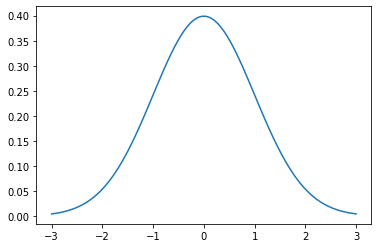

In [2]:
# simulation of the Gaussian distribution of a variable X
# x-axis indicates the values of X
# y-axis indicates the frequency of each value
# x is spread over a big range (-3,3)

import matplotlib.pyplot as plt
import numpy as np
import matplotlib.mlab as mlab
import math
import scipy.stats as stats

mu = 0
variance = 1
sigma = math.sqrt(variance)
x = np.linspace(mu-3*variance,mu+3*variance, 100)
plt.plot(x,stats.norm.pdf(x, mu, sigma))

plt.show()

In the Gaussian distribution depicted in the figure above, the values of the individual observations vary greatly across a wide range of x values (in this case -2 to 2). 

In variables with skewed distributions, the majority of the observations available to predict Y, vary within a very narrow value range of X, and very few observations are available in the tails of the distribution. See Figure 2 below.

In [3]:
from scipy import linspace
from scipy import pi,sqrt,exp
from scipy.special import erf

from pylab import plot,show

def pdf(x):
    return 1/sqrt(2*pi) * exp(-x**2/2)

def cdf(x):
    return (1 + erf(x/sqrt(2))) / 2

def skew(x,e=0,w=1,a=0):
    t = (x-e) / w
    return 2 / w * pdf(t) * cdf(a*t)

n = 2**10

e = 1.0 # location
w = 2.0 # scale

x = linspace(-10,10,n) 


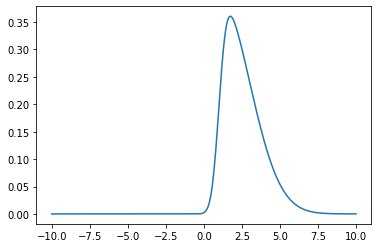

In [4]:
# This simulation shows a variable X skewed to the left. The majority of the values of X are accumulated
# on the right hand side of the plot, with only a few observations on the left tail.
# This meas, that we do not have enough values of X on the left, for our prediction model to learn from

# more precisely, there are a lot of observations for the value range of x (0,5), but very few for the range (-10, 0)

p = skew(x,e,w,5)
plot(x,p)
plt.show()

In the skewed distribution above we see that the majority of the observations take values over a very narrow value range (2-2.5 in this example), with few observations taking higher values (> 5 in this example). Therefore, regardless of the outcome, most observations will have values in the 2-2.5 space, making discrimination and outcome prediction difficult. 

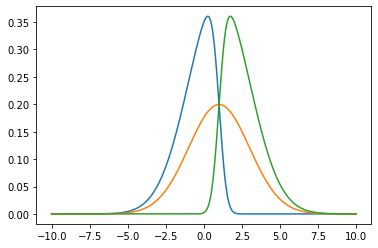

In [5]:
# overlay of a normal distribution (yellow), with 2 skewed distributions (green and blue)

for a in [-5,0,5]:
    p = skew(x,e,w,a)
    plot(x,p)

show()

In the figure above, we can see more clearly, how in a variable with a Gaussian distribution, the different observations can take values in a wider value range, than in a skewed variable, where the majority of values are concentrated on one end.

### What can we do if variables are skewed?

If the performance o the machine learning model is poor due to the skewed distribution of the variables, there are two strategies available to improve performance:

1. Find a transformation of the variable X that stabilizes the variance and generates more consistent support across the range of values (a transformation that gives the variable more of the bell-shape of the Gaussian Distribution).

2. Choose an appropriate binning transformation (discretisation) in order to  enable each portion of the predictors' ranges to be weighted appropriately.

**I will discuss these 2 methods in more detail in sections 14 and 15.

In this notebook, I will discuss some diagnostic methods to determine whether the variables have an approximate normal distribution, and make some experiments to see how normality affects the performance of machine learning algorithms.

=============================================================================

## Real Life example: 

### Predicting Survival on the Titanic: understanding society behaviour and beliefs

Perhaps one of the most infamous shipwrecks in history, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 people on board. Interestingly, by analysing the probability of survival based on few attributes like gender, age, and social status, we can make very accurate predictions on which passengers would survive. Some groups of people were more likely to survive than others, such as women, children, and the upper-class. Therefore, we can learn about the society priorities and privileges at the time.


### Predicting Sale Price of Houses

The problem at hand aims to predict the final sale price of homes based on different explanatory variables describing aspects of residential homes. Predicting house prices is useful to identify fruitful investments, or to determine whether the price advertised for a house is over or underestimated, before making a buying judgment.


## Titanic dataset

In [6]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import pylab 
import scipy.stats as stats

# for regression problems
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor


# for classification
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# to split and standarize the datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# to evaluate regression models
from sklearn.metrics import mean_squared_error

# to evaluate classification models
from sklearn.metrics import roc_auc_score

In [7]:
# load the numerical variables of the Titanic Dataset
data = pd.read_csv('titanic.csv', usecols = ['Pclass', 'Age', 'Fare', 'Survived'])
data.head()

,Survived,Pclass,Age,Fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500


#### Age

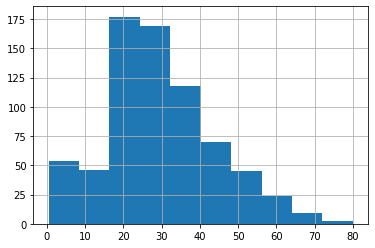

In [8]:
# plot the histograms to have a quick look at the distributions

data.Age.hist()

One way of assessing whether the distribution is approximately normal is to evaluate the Quantile-Quantile plot (Q-Q plot).

In a QQ-plot, the quantiles of the variable are plotted on the vertical axis, and the quantiles of a specified probability distribution (Gaussian distribution) are on the horizontal axis. The plot consists of a series of points that show the relationship between the real data and the specified probability distribution. If the values of a variable perfectly match the specified probability distribution, the points on the graph will form a 45 degree line. See below.

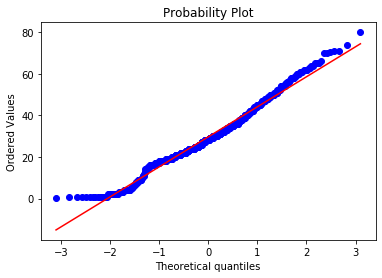

In [9]:
# let's plot the Q-Q plot for the variable Age.
temp = data.dropna(subset=['Age'])
stats.probplot(temp.Age, dist="norm", plot=pylab)
pylab.show()

The majority of the observations lie on the 45 degree red line following the expected quantiles of the theoretical Gaussian distribution. Some observations at the lower end of the value range depart from the red line, and this is consistant with the slight shift towards the left in the variable distribution observed in the histogram above.

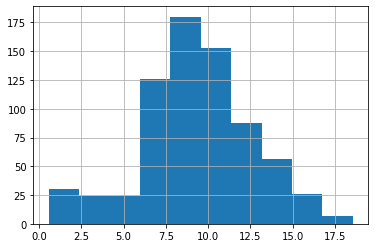

In [10]:
# let's apply a transformation and see what it does to the distribution
(data.Age**(1/1.5)).hist()

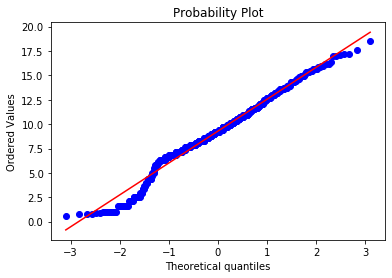

In [11]:
# and now the effect of the transformation on the Q-Q plot
stats.probplot((temp.Age**(1/1.5)), dist="norm", plot=pylab)
pylab.show()

The variable transformation did not end up in Gaussian distribution of the transformed Age values.

#### Fare

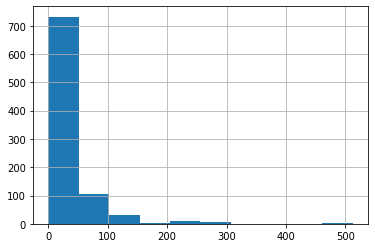

In [12]:
# let's have a look at the Fare variable 

data.Fare.hist()

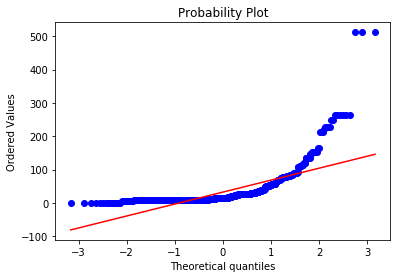

In [13]:
# and the Q-Q plot
stats.probplot(data.Fare, dist="norm", plot=pylab)
pylab.show()

Both from the histogram and from the Q-Qplot it is clear that Fare does not follow a Gaussian distribution.

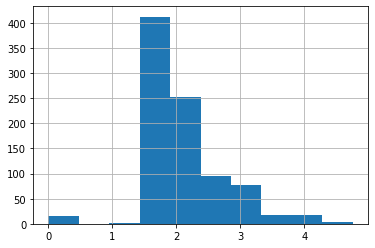

In [14]:
# and now let's apply a transformation
(data.Fare**(1/4)).hist()

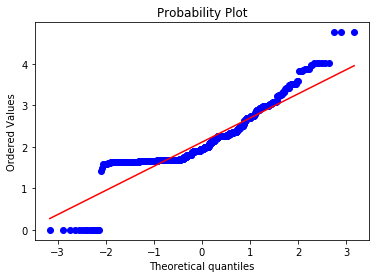

In [15]:
# and the Q-Q plot
stats.probplot((data.Fare**(1/4)), dist="norm", plot=pylab)
pylab.show()

We can see that after the transformation, the quantiles are somewhat more aligned over the 45 degree line with the theoretical quantiles of the Gaussian distribution. The transformation is not perfect but it does end in a broader distribution of the values over a wider value range of the variable. 

### Model performance with original and transformed variables

In [16]:
# let's add the transformed variables to the dataset
data['Fare_transformed'] = data.Fare**(1/4)
data['Age_transformed'] = data.Age**(1/1.5)

In [17]:
# let's separate into training and testing set
X_train, X_test, y_train, y_test = train_test_split(data.fillna(0), data.Survived, test_size=0.3,
                                                    random_state=0)
X_train.shape, X_test.shape

((623, 6), (268, 6))

In [18]:
# let's scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Logistic Regression

In [19]:
# model build using the natural distributions

logit = LogisticRegression(random_state=44, C=1000) # c big to avoid regularization
logit.fit(X_train[['Age', 'Fare']], y_train)
print('Train set')
pred = logit.predict_proba(X_train[['Age', 'Fare']])
print('Logistic Regression roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
print('Test set')
pred = logit.predict_proba(X_test[['Age', 'Fare']])
print('Logistic Regression roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))

Train set
Logistic Regression roc-auc: 0.6863354374091668
Test set
Logistic Regression roc-auc: 0.71375


In [20]:
# model built using the transformed variables

logit = LogisticRegression(random_state=44, C=1000) # c big to avoid regularization
logit.fit(X_train[['Age_transformed', 'Fare_transformed']], y_train)
print('Train set')
pred = logit.predict_proba(X_train[['Age_transformed', 'Fare_transformed']])
print('Logistic Regression roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
print('Test set')
pred = logit.predict_proba(X_test[['Age_transformed', 'Fare_transformed']])
print('Logistic Regression roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))

Train set
Logistic Regression roc-auc: 0.6868018047330862
Test set
Logistic Regression roc-auc: 0.7275595238095238


In [22]:
###Using transformed variables improved the performance of the Logistic Regression model (compare test roc auc: 0.7137 vs 0.7275).

### Support Vector Machine

In [23]:
# model build using natural distributions

SVM_model = SVC(random_state=44, probability=True)
SVM_model.fit(X_train[['Age', 'Fare']], y_train)
print('Train set')
pred = SVM_model.predict_proba(X_train[['Age', 'Fare']])
print('Logistic Regression roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
print('Test set')
pred = SVM_model.predict_proba(X_test[['Age', 'Fare']])
print('Logistic Regression roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))

Train set
Logistic Regression roc-auc: 0.6792694301642047
Test set
Logistic Regression roc-auc: 0.6820238095238095


In [24]:
# model built on transformed variables

SVM_model = SVC(random_state=44, probability=True)
SVM_model.fit(X_train[['Age_transformed', 'Fare_transformed']], y_train)
print('Train set')
pred = SVM_model.predict_proba(X_train[['Age_transformed', 'Fare_transformed']])
print('Logistic Regression roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
print('Test set')
pred = SVM_model.predict_proba(X_test[['Age_transformed', 'Fare_transformed']])
print('Logistic Regression roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))

Train set
Logistic Regression roc-auc: 0.6961996485976444
Test set
Logistic Regression roc-auc: 0.7123809523809523


For SVM the transformation of the variables also improved the performance of the model. Not only has the SVM now a better generalisation on the test set, the mode built using the transformed variables does not over-fit to the train set (compare train roc-auc 0.927 vs 0.726 for training set).

### Random Forests

In [25]:
# model build using natural distributions

rf = RandomForestClassifier(n_estimators=700, random_state=39)
rf.fit(X_train[['Age', 'Fare']], y_train)
print('Train set')
pred = rf.predict_proba(X_train[['Age', 'Fare']])
print('Random Forests roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
print('Test set')
pred = rf.predict_proba(X_test[['Age', 'Fare']])
print('Random Forests roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))

Train set
Random Forests roc-auc: 0.9915457365349993
Test set
Random Forests roc-auc: 0.7343452380952381


In [26]:
# model built on transformed variables

rf = RandomForestClassifier(n_estimators=700, random_state=39)
rf.fit(X_train[['Age_transformed', 'Fare_transformed']], y_train)
print('Train set')
pred = rf.predict_proba(X_train[['Age_transformed', 'Fare_transformed']])
print('Random Forests roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
print('Test set')
pred = rf.predict_proba(X_test[['Age_transformed', 'Fare_transformed']])
print('Random Forests roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))

Train set
Random Forests roc-auc: 0.9915023535281231
Test set
Random Forests roc-auc: 0.7371726190476191


As expected, Random Forests did not see a benefit from transforming the variables to a more Gaussian like distribution.

## House Sale Dataset

In [27]:
# let's load the House Sale Price dataset with a few columns

cols_to_use = ['LotArea', 'BsmtFinSF1','GrLivArea', 'OpenPorchSF', 'YearBuilt', 'SalePrice']
data = pd.read_csv('houseprice.csv', usecols=cols_to_use)
data.head()

,LotArea,YearBuilt,BsmtFinSF1,GrLivArea,OpenPorchSF,SalePrice
0,8450,2003,706,1710,61,208500
1,9600,1976,978,1262,0,181500
2,11250,2001,486,1786,42,223500
3,9550,1915,216,1717,35,140000
4,14260,2000,655,2198,84,250000


In [28]:
# let's check for missing data
data[cols_to_use].isnull().sum()

LotArea        0
BsmtFinSF1     0
GrLivArea      0
OpenPorchSF    0
YearBuilt      0
SalePrice      0
dtype: int64

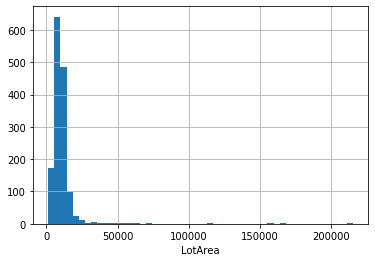

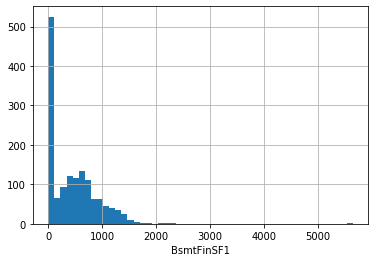

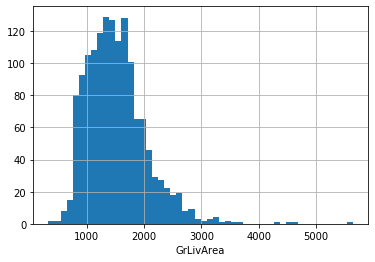

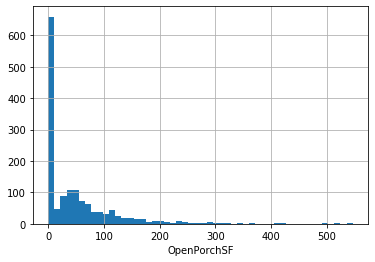

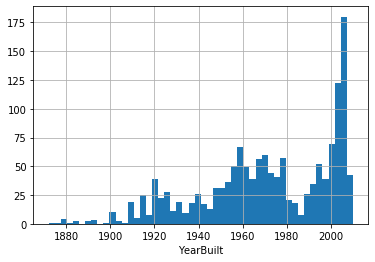

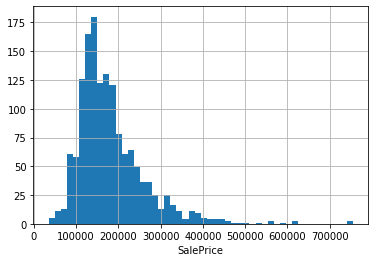

In [29]:
# let's plot the histograms to have an impression of the distribution of the numerical variables
for col in cols_to_use:
    fig = data[col].hist(bins=50)
    fig.set_xlabel(col)
    fig.set_label('Number of houses')
    plt.show()

In [30]:
We observed that the numerical variables are not normally distributed. In particular, most of them apart from YearBuilt are skewed.

SyntaxError: invalid syntax (<ipython-input-30-4be4aceb025b>, line 1)

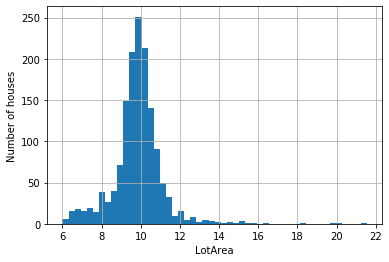

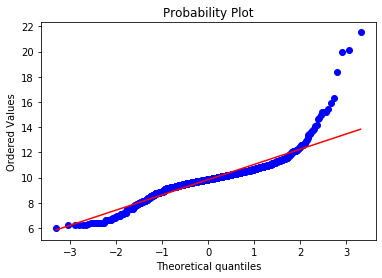

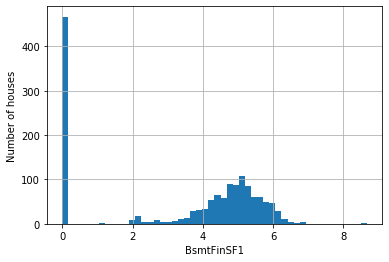

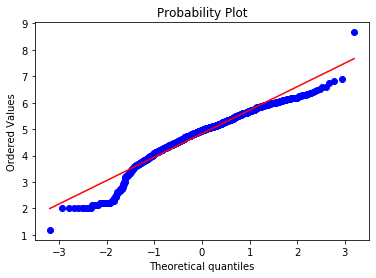

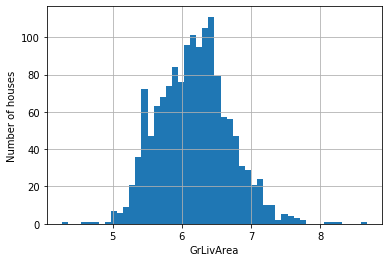

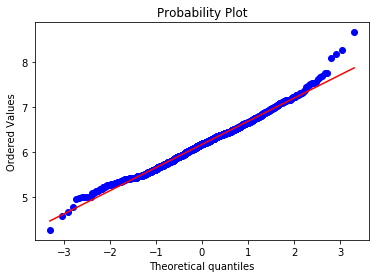

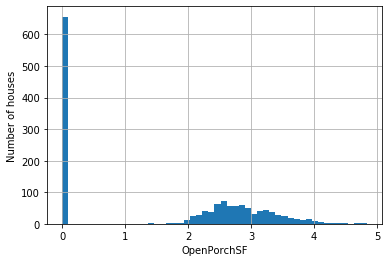

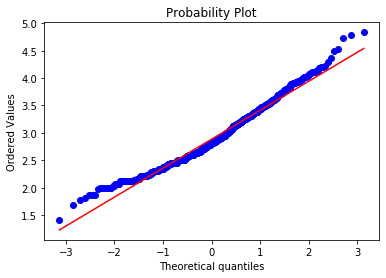

In [31]:
# let's  apply a transformation and see whether the variables are now more Gaussian shaped
# on top of the histograms we plot now as well the Q-Q plots

for col in cols_to_use:
    if col not in ['SalePrice', 'YearBuilt']:
        data[col+'_transformed'] = data[col]**(1/4)
        fig = data[col+'_transformed'].hist(bins=50)
        fig.set_xlabel(col)
        fig.set_ylabel('Number of houses')
        plt.show()
        stats.probplot(data[data[col+'_transformed']!=0][col+'_transformed'], dist="norm", plot=pylab)
        plt.show()
        


We see that in the Q-Q plots, that most of the observations (blue dots) lie on the 45 degree line. Therefore the transformation was successful in attributing a Gaussian-like shape to the variables.

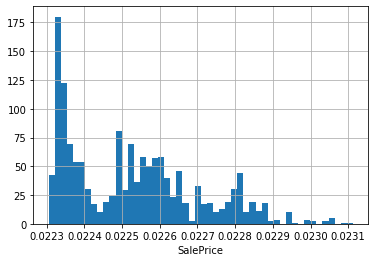

In [32]:
# tried a few transformation on the variable YearBuilt without major success, you can go ahead and try other transformations
data['YearBuilt_transformed'] = data['YearBuilt']**(1/-2)
fig = data['YearBuilt_transformed'].hist(bins=50)
fig.set_xlabel(col)
plt.show()

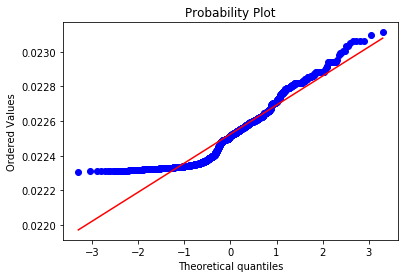

In [33]:
stats.probplot(data['YearBuilt_transformed'], dist="norm", plot=pylab)
pylab.show()

However, the transformation of the variable 'YearBuilt_transformed' does not help to get a more 'Gaussian'-like distribution.

### Machine learning model performance on original vs transformed variables

In [34]:
# let's separate into training and testing set
X_train, X_test, y_train, y_test = train_test_split(data.fillna(0), data.SalePrice, test_size=0.3,
                                                    random_state=0)
X_train.shape, X_test.shape

((1022, 11), (438, 11))

In [35]:
X_train.head()

,LotArea,YearBuilt,BsmtFinSF1,GrLivArea,OpenPorchSF,SalePrice,LotArea_transformed,BsmtFinSF1_transformed,GrLivArea_transformed,OpenPorchSF_transformed,YearBuilt_transformed
64,9375,1997,739,2034,36,219500,9.839948,5.213881,6.715645,2.44949,0.022377
682,2887,1996,1003,1291,0,173000,7.330130,5.627626,5.994205,0.00000,0.022383
960,7207,1958,696,858,0,116500,9.213797,5.136323,5.412175,0.00000,0.022599
1384,9060,1939,204,1258,0,105000,9.756230,3.779267,5.955526,0.00000,0.022710
1100,8400,1920,290,438,0,60000,9.573480,4.126668,4.574762,0.00000,0.022822


In [36]:
y_train.head()

64      219500
682     173000
960     116500
1384    105000
1100     60000
Name: SalePrice, dtype: int64

In [37]:
# create a list with the untransformed columns
cols_to_use = cols_to_use[0:-1]
cols_to_use

['LotArea', 'BsmtFinSF1', 'GrLivArea', 'OpenPorchSF', 'YearBuilt']

In [38]:
# create a list with the transformed columns
cols_transformed = [col+'_transformed' for col in cols_to_use]
cols_transformed

['LotArea_transformed',
 'BsmtFinSF1_transformed',
 'GrLivArea_transformed',
 'OpenPorchSF_transformed',
 'YearBuilt_transformed']

In [39]:
# let's standarise the dataset
scaler = StandardScaler()
X_train_o = scaler.fit_transform(X_train[cols_to_use])
X_test_o = scaler.transform(X_test[cols_to_use])

In [40]:
# let's standarise the dataset
scaler = StandardScaler()
X_train_t = scaler.fit_transform(X_train[cols_transformed])
X_test_t = scaler.transform(X_test[cols_transformed])

### Linear Regression

In [41]:
linreg = LinearRegression()
linreg.fit(X_train_o, y_train)
print('Train set')
pred = linreg.predict(X_train_o)
print('Linear Regression mse: {}'.format(mean_squared_error(y_train, pred)))
print('Test set')
pred = linreg.predict(X_test_o)
print('Linear Regression mse: {}'.format(mean_squared_error(y_test, pred)))
print()

Train set
Linear Regression mse: 1685940584.862607
Test set
Linear Regression mse: 2719110421.33123



In [42]:
cols_transformed = [col+'_transformed' for col in cols_to_use]
linreg = LinearRegression()
linreg.fit(X_train_t, y_train)
print('Train set')
pred = linreg.predict(X_train_t)
print('Linear Regression mse: {}'.format(mean_squared_error(y_train, pred)))
print('Test set')
pred = linreg.predict(X_test_t)
print('Linear Regression mse: {}'.format(mean_squared_error(y_test, pred)))
print()

Train set
Linear Regression mse: 1882403543.7678099
Test set
Linear Regression mse: 2472286266.309727



We can see that variable transformation improved the model performance, the mse on the test set is smaller when using the Linear Regression model built on the transformed variables (2.7e6 vs 2.4e6). In addition, the mse on the train set is bigger, suggesting that the model built using the natural distributions is over-fitting to the train set (mse 1.6e6 vs 1.8e6).

In [43]:
rf = RandomForestRegressor(n_estimators=5, random_state=39, max_depth=2,min_samples_leaf=100)
rf.fit(X_train_o, y_train)
print('Train set')
pred = rf.predict(X_train_o)
print('Random Forests mse: {}'.format(mean_squared_error(y_train, pred)))
print('Test set')
pred = rf.predict(X_test_o)
print('Random Forests mse: {}'.format(mean_squared_error(y_test, pred)))
print()
print()

rf = RandomForestRegressor(n_estimators=5, random_state=39, max_depth=2,min_samples_leaf=100)
rf.fit(X_train_t, y_train)
print('Train set')
pred = rf.predict(X_train_t)
print('Random Forests mse: {}'.format(mean_squared_error(y_train, pred)))
print('Test set')
pred = rf.predict(X_test_t)
print('Random Forests mse: {}'.format(mean_squared_error(y_test, pred)))
print()
print()

Train set
Random Forests mse: 2719095855.980676
Test set
Random Forests mse: 3276824559.070401


Train set
Random Forests mse: 2719095855.980676
Test set
Random Forests mse: 3276824559.070401




As expected the Random Forests is not affected by variable transformation.

**That is all for this demonstration. I hope you enjoyed the notebook, and see you in the next one.**